# 2c)

Importamos las librerías/funciones necesarias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

from scipy.stats import beta

Definimos funciones generales

In [11]:
def aceptacion_rechazo(N, M, f, g, r = False):
    '''
    Si r es True se devuelve los puntos rechazados dentro del loop.
    '''
    n = 0
    aceptados = []
    rechazados = []
    while n < N:
        u = np.random.uniform(0,1)
        y = g(sim=True)
        if u <= f(y)/(M*g(y)):
            aceptados.append([y, u*M*g(y)])
            n += 1
        else:
            rechazados.append([y, u*M*g(y)])
    return (np.array(aceptados), np.array(rechazados)) if r == True else np.array(aceptados)[:,0]

def Algo3(h,g,M):
    x = g(sim=True)
    u = np.random.uniform(0,1)
    if u < h(x)/(M*g(x)):
        return x
    else:
        return Algo3(h,g,M)

def graficar_resultados_accept_reject(aceptados, rechazados, f, g, M, puntos):
    plt.figure(figsize = (8,6))
    # PUNTOS
    plt.scatter(aceptados[:,0], aceptados[:,1],
                c='blue', s=10,
                label='Aceptados',
                )
    plt.scatter(rechazados[:,0], rechazados[:,1],
                c='red', s=10,
                label='Rechazados')
    # LINEAS
    plt.plot(puntos, f(puntos),
             c='black', ls='--', lw=3,
             label = 'Densidad objetivo')
    plt.plot(puntos, M * g(puntos),
             c='black', lw=3,
             label = f'{M=} * Densidad instrumental')
    plt.title(f'Puntos generados por el método')
    plt.legend();

# EJEMPLO 1

[ojito con](https://rh8liuqy.github.io/Accept_reject.html)

In [3]:
f = lambda x:  beta(2.7, 6.3).pdf(x)
g_1 = np.vectorize(lambda x = 0, sim = False: np.random.uniform(0,1) if sim == True else 1)

N = 10_000
M_1 = 2.669
aceptados, rechazados = aceptacion_rechazo(N, M_1, f, g_1, r = True)

In [4]:
1/M_1

0.37467216185837393

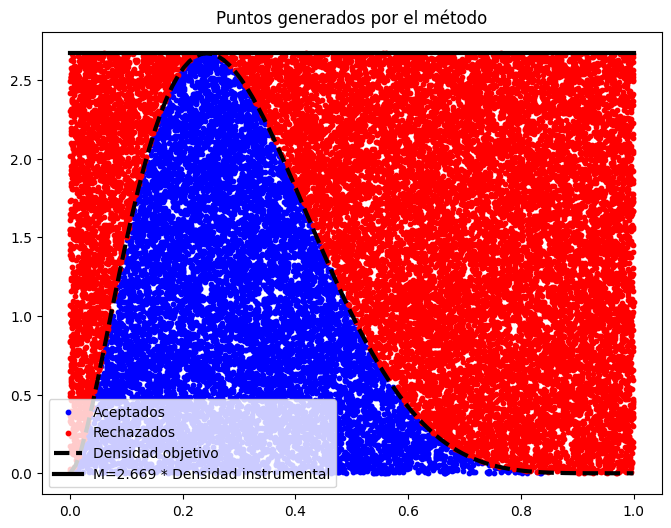

In [5]:
puntos = np.linspace(0,1,100)
graficar_resultados_accept_reject(aceptados, rechazados, f, g_1, M_1, puntos)

# EJEMPLO 2

In [6]:
f = lambda x:  beta(2.7, 6.3).pdf(x)
g_2 = np.vectorize(lambda x = 0, sim = False: beta(2,6).rvs() if sim == True else beta(2,6).pdf(x))

N = 10_000
M_2 = 1.67
aceptados, rechazados = aceptacion_rechazo(N, M_2, f, g_2, r = True)

In [7]:
1/M_2

0.5988023952095809

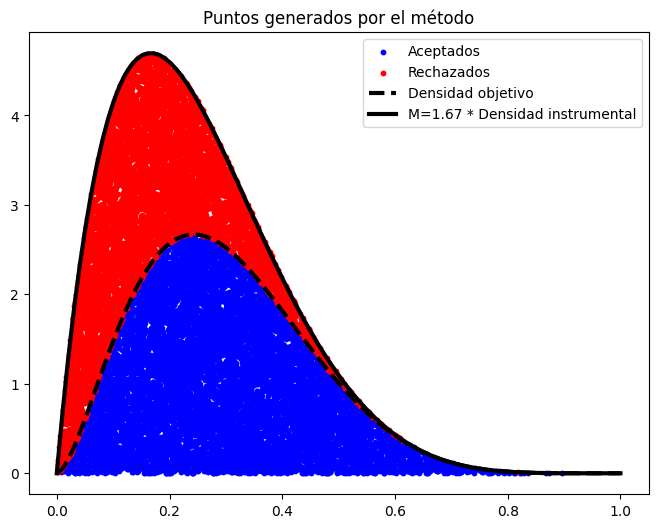

In [8]:
graficar_resultados_accept_reject(aceptados, rechazados, f, g_2, M_2, puntos)

# COMPARAMOS LOS MÉTODOS

Usamos como densidad instrumental la uniforme.

In [33]:
N = 2_000

In [34]:
%%time
algoritmo = np.array([Algo3(f,g_1,M_1) for _ in range(N)])

CPU times: total: 2.8 s
Wall time: 6.79 s


In [35]:
%%time
aceptados, rechazados = aceptacion_rechazo(N, M_1, f, g_1, r = True)

CPU times: total: 3.05 s
Wall time: 7.18 s


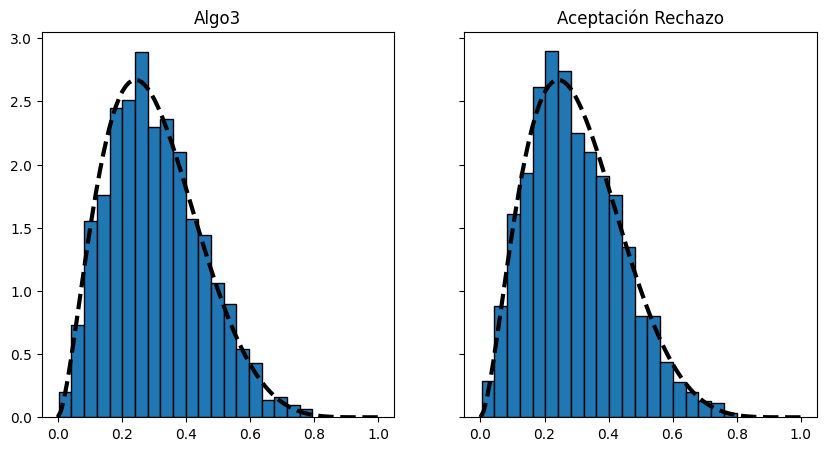

In [ ]:
fig, axs = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,5))

axs[0].hist(algoritmo, bins=20, density=True, edgecolor='k')
axs[0].plot(puntos,f(puntos), lw=3, ls='--', c='k')
axs[0].set_title('Algo3')

axs[1].hist(aceptados[:,0], bins=20, density=True, edgecolor='k')
axs[1].plot(puntos,f(puntos), lw=3, ls='--', c='k')
axs[1].set_title('Aceptación Rechazo');

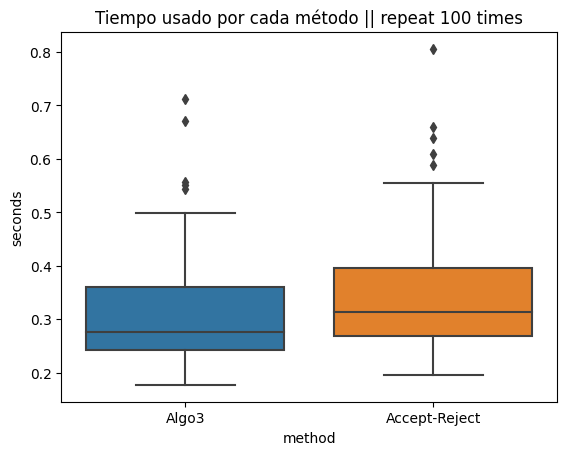

In [39]:
N = 100

algo3 = timeit.repeat(lambda : [Algo3(f,g_1,M_1) for _ in range(N)], repeat = 100, number = 1)
ac_re = timeit.repeat(lambda : aceptacion_rechazo(N, M_1, f, g_1, r = True), repeat = 100, number = 1)

df1 = pd.DataFrame({"seconds":algo3,"method":"Algo3"})
df2 = pd.DataFrame({"seconds":ac_re,"method":"Accept-Reject"})
df_plot = pd.concat((df1,df2))
fig,ax = plt.subplots()
ax = sns.boxplot(x = "method", y = "seconds", data = df_plot)
ax.set_title("Tiempo usado por cada método || repeat 100 times")
plt.show()